
![gog](http://r.qcbs.ca/workshop03/book-en/images/gglayers.png)

____
# ICA Wed: Visualization Technicalities

In today's ICA we will explore the grammar of graphics (GoG), which is a less well-known, but increasingly popular, paradigm for producing visualizations. 

There is no lecture today. Instead, you will watch a video _after_ you have completed the ICA. 

To keep things simple for today, since class is short, we'll stick with Altair. But, there are many other GoG libraries out there and you should explore them! If I had to suggest perhaps the most obvious library to learn after ([before?](https://www.youtube.com/watch?v=jNiQaErXg8s)) Altair, it would be Plotly; as you have seen in some of the assignments, it is very powerful. 

Anyway, let's get to it! 

We are going to walk through the steps of building a visualization **very slowly** - what might seem like ridiculously slow. But, the idea is that you appreciate how the "grammar" works. 

Your first step is to have two people in your group hook their computers to a monitor (you have two of them!) so that each group member can follow two datasets. In the first part of this ICA you will:
* read what I wrote and follow along (for the mpg dataset); put this on, say, the left monitor,
* mimic each step with a second dataset (e.g., the iris or penguin dataset - you pick one!). 

I want to be sure you know how to perform these steps for your own dataset. 


I'll use for today the "mpg" dataset and bring it in through `vega_datasets`, another place to get nice datasets. You get another dataset.

In [1]:
import altair as alt
from vega_datasets import data
cars = data.cars()

import seaborn as sns
iris = sns.load_dataset("iris")

We are going to start with [`.Chart`](https://altair-viz.github.io/getting_started/starting.html#the-chart-object), although Altair has [other options](https://altair-viz.github.io/user_guide/API.html#top-level-objects). The way you get started is to call Altair through `alt` (or whatever you chose to call in the `import` statement), create a chart and pass the dataframe. Note that the dataframe is the natural container for Altair (as opposed to lists, dictionaries or arrays), just as it was for Seaborn. Basically, this means Altair keeps track of the columns names and can use them.  

Run this piece of code, which will generate an error.

In [2]:
#alt.Chart(cars)

What Altair is complaining about is that it is not possible to map the data onto a visual without knowing a minimal level of mapping. We need to use at least one more dot in the dot chain! Let's a `.mark_point` to map numbers to symbols. 

Next, run this cell:


In [3]:
alt.Chart(cars).mark_point()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

✅Here for the iris dataset.

In [4]:
alt.Chart(iris).mark_point()

alt.Chart(...)

What do you see? This might not look like much - a circle in a square. Seems weird, right? 

This result is expected in the GoG way of doing things: we have mapped the data onto a marker, _but have not given any more information_ about how it should be organized. Thus, we get a "0D" plot! Next time you need a 0D plot, you know how to make one!

The next "dot" that we need is an encoding (`.encode()`) that maps the markers to some geometry; that is, to an axis (or more). Let's do a simple encoding next:


In [5]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower'
)

alt.Chart(...)

✅Here for the iris dataset.

In [6]:
alt.Chart(iris).mark_point().encode(
    x='sepal_width'
)

alt.Chart(...)

Gorgeous! Since we only encoded one variable to the $x$ axis, we get a 1D plot. Interestingly, this is basically a "rug plot", which we saw in Seaborn and you made in the HW. In Altair's GoG, a rug plot is a very natural type of plot. 

Do this with your dataset; compare the two monitors. 

If you want an "official" rug plot, try `mark_tick()`. 

  But, let's keep going! Let's add an encoding to the $y$ axis. 

In [7]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

alt.Chart(...)

✅Here for the iris dataset.

In [8]:
alt.Chart(iris).mark_point().encode(
    x='sepal_width',
    y='sepal_length'
)

alt.Chart(...)

At this point, we have a normal 2D scatter plot. Relative to `matplotlib`, the syntax looks maybe unusual; but, there is a nice logic to it. 

Let's make two jumps now, adding a color and also getting some of the true power of Altair by making the plot interactive. Again, do this with your second dataset. Here's how you do that:

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

✅Here for the iris dataset.

In [10]:
alt.Chart(iris).mark_point().encode(
    x='sepal_width',
    y='sepal_length',
    color='species',
).interactive()

alt.Chart(...)

What interactions can you do? Can you pan? Zoom? Save a PNG? If you double click, it returns you to the default settings. 

What if we want to do EDA on this dataset and put a categorical variable on the $x$ axis? 

Simple:

In [11]:
alt.Chart(cars).mark_point().encode(
    x='Origin',
    y='Miles_per_Gallon',
    color='Cylinders',
).interactive()

alt.Chart(...)

✅Here for the iris dataset.

In [12]:
alt.Chart(iris).mark_point().encode(
    x='species',
    y='sepal_length',
    color='sepal_length',
).interactive()

alt.Chart(...)

Try this with the categorical variables in the second dataset as well.

What about the $y$ axis?

In [13]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders',
).interactive()

alt.Chart(...)

✅Here for the iris dataset.

In [14]:
alt.Chart(iris).mark_point().encode(
    y='species',
    x='sepal_length',
    color='sepal_length',
).interactive()

alt.Chart(...)

Notice how the `color` option works for real values (this case) and discrete categories (the case above with `color='Origin'`). 

What does this next code do? That is, what is the ":O"? [hint](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

In [15]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:O',
).interactive()

alt.Chart(...)

What happens if you change the ":O" to ":N"? 

Again, compare and constrast the two datasets on the two monitors. 

✅Try :N other than :O.

In [16]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
).interactive()

alt.Chart(...)

✅Here for the iris dataset.

I round the number to zero decimals first so the color option won't be a really long list goes 1.1, 1.2, 1.3, 1.4 ......

In [17]:
cl = round(iris.sepal_length)
iris["cl"] = cl

In [18]:
alt.Chart(iris).mark_point().encode(
    y='species',
    x='sepal_length',
    color='cl:O',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [19]:

alt.Chart(iris).mark_point().encode(
    y='species',
    x='sepal_length',
    color="cl:N",
).interactive()

alt.Chart(...)

Ok, you get the idea: GoG is very nice for EDA!

There is a lot more to GoG, but we want to keep this fairly short. 

____

But, now it is your turn. To complete this ICA you will need to use the [Altair docs](https://altair-viz.github.io/index.html). 


Take this dataset and vary these options:
* change `mark_point` to several of the [other options](https://altair-viz.github.io/user_guide/marks.html) (e.g., bar),
* how do you change colors?


✅In encoding change the line "color = xxx".

* vary the [encodings](https://altair-viz.github.io/user_guide/encoding.html),
* how do you export a PNG or PDF?


✅Click on the top-right conor and select save as png/pdf.

* for DS, tooltips are extremely useful - [make a plot with tooltips](https://altair-viz.github.io/gallery/scatter_tooltips.html)
* make a plot that uses [facets](https://altair-viz.github.io/user_guide/compound_charts.html),
* look through the gallery and attempt some of the styles, such as area charts, circular plots, and so on,
* discuss with your group members what their plans are for visualizations in their projects - list some examples in a markdown cell of how Altair plots might be used among your group members. (Or, are your group members planning to not use Altair at all?) 

If you like Altair and want to use it for your project, take a look at [this example](https://altair-viz.github.io/case_studies/exploring-weather.html). If you want an East Lansing weather dataset, let me know. 

✅Tick plots.

In [20]:
alt.Chart(cars).mark_tick().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
).interactive()

alt.Chart(...)

✅Bar plots.

In [34]:
alt.Chart(cars).mark_bar().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

✅With tooltip.

In [42]:
alt.Chart(cars).mark_tick().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

✅Here for facet plots.

In [40]:
from altair.expr import datum
base = alt.Chart(cars).mark_point().encode(
    x='Cylinders',
    y='Horsepower',
    color='Origin'
).properties(
    width=160,
    height=160
)

chart = alt.hconcat()
for Origin in ['USA', 'Japan', 'Europe']:
    chart |= base.transform_filter(datum.Origin == Origin)
chart

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.HConcatChart(...)

✅Area charts.

In [41]:
alt.Chart(cars).mark_area().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:N',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

✅And yes, we will be using altair for the project, it is a perfect package.

____

# Between Wed and Fri....

I didn't want to lecture Wed to give you plenty of time on the ICA. And, having done a little GoG makes it easier for you to digest the theory, rather than the other way around. At your leisure, watch this video. When you are done, feel free to look at the ICA for Fri.



____

In [21]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7wTIkbKaCGk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/tl/Library/Python/3.9/lib/python/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In a markdown cell, confirm that you watched the video all the way through. 


✅SURE

____

# ICA Friday 



In today's ICA, we will practice telling a story with data. The instructions are simple:
1. with your group, choose a dataset (just one), _[read the instructions first to be sure you pick a "good enough" dataset]_
2. each person in your group then works alone for $15$ minutes, thinking about what the dataset tells them (with **no** communication among group members),
3. based on the story you have found in the dataset, make $2-3$ visualizations,
4. present your story to the rest of the group: put your  visualizations on the monitor, and stand near the monitor and present formally to your group - this is practice for communication skills (which you will use for the projects!),
5. use good visualization practices: it's your choice, but perhaps remove spines, darken the grid, make some lines gray, use arrows, add annotations, and so on -- the choices you make should reflect the specific story you wish to tell.

Each student will likely arrive at a different narrative, even though the dataset is the same. So, each visualizations will be completely different to reflect that unique narrative. 

If you have a large group, you should think carefully about timing. You may need to use two monitors and have two subgroups presenting. 

___

In case you need a start: suppose your group picks the penguins dataset. One group member might focus on a story about the female penguins. Another might focus on the island with the most diverse penguin population. Yet another could focus on the smallest of the penguins. 

Another good dataset is the one from Wed: there are many narratives possible in the `mpg` (cars) dataset. 

Feel free to use any visualization library you wish: Plotly, Altair, matplotlib, Seaborn, etc...or any combination. 

In [22]:
import altair as alt
from vega_datasets import data

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
unemp = data.unemployment_across_industries()
unemp.head(10)

,series,year,month,count,rate,date
0,Government,2000,1,430,2.1,2000-01-01 08:00:00+00:00
1,Government,2000,2,409,2.0,2000-02-01 08:00:00+00:00
2,Government,2000,3,311,1.5,2000-03-01 08:00:00+00:00
3,Government,2000,4,269,1.3,2000-04-01 08:00:00+00:00
4,Government,2000,5,370,1.9,2000-05-01 07:00:00+00:00
5,Government,2000,6,603,3.1,2000-06-01 07:00:00+00:00
6,Government,2000,7,545,2.9,2000-07-01 07:00:00+00:00
7,Government,2000,8,583,3.1,2000-08-01 07:00:00+00:00
8,Government,2000,9,408,2.1,2000-09-01 07:00:00+00:00
9,Government,2000,10,391,2.0,2000-10-01 07:00:00+00:00


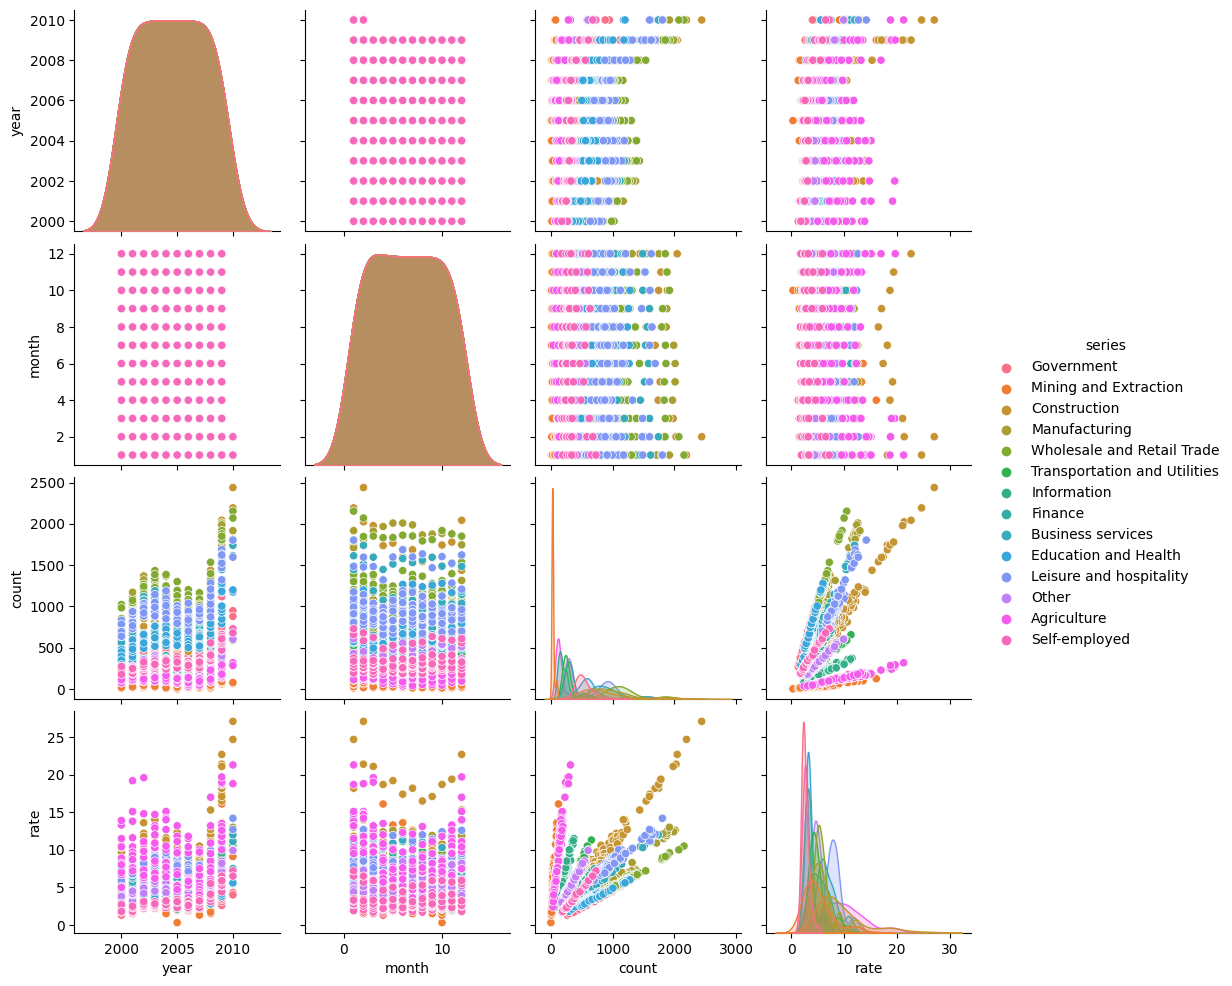

In [23]:
sns.pairplot(unemp,hue = "series")


In [24]:
alt.Chart(unemp).mark_point().encode(
    x='series',
    y='rate',
    color='year:N',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [25]:
mean_rate = unemp.groupby("series").mean("rate")["rate"]
type(mean_rate)
print(mean_rate.idxmax())
print(mean_rate.max())

print(mean_rate.idxmin())
print(mean_rate.min())


Agriculture
9.840983606557376
Government
2.5811475409836064


In [26]:
agri = unemp.loc[unemp['series'] == "Agriculture"]
agri
alt.Chart(agri).mark_point().encode(
    x='year:O',
    y='rate',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [27]:
alt.Chart(agri).mark_point().encode(
    x='year:O',
    y='count',
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [28]:
agri.corr()

/var/folders/dz/2yjc397x60v3b_fbq4kqh2qc0000gn/T/ipykernel_8517/4013029950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  agri.corr()


,year,month,count,rate
year,1.000000,-0.043412,0.070742,0.093383
month,-0.043412,1.000000,-0.242140,-0.288635
count,0.070742,-0.242140,1.000000,0.974748
rate,0.093383,-0.288635,0.974748,1.000000


In [29]:
year_08 = unemp.loc[unemp['year'] == 2008]

alt.Chart(unemp).mark_tick().encode(
    x='series',
    y='rate',
    color = "year:N"
).interactive()


/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [30]:
alt.Chart(unemp).mark_point().encode(
    x='month',
    y='rate',
    color = "series"
).interactive()

/Users/tl/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [31]:
rate_by_month = unemp.groupby(["month","series"]).mean("rate")["rate"]
rate_by_month.nlargest(20)


month  series                 
3      Agriculture                13.830000
1      Agriculture                13.763636
2      Agriculture                13.645455
       Construction               13.600000
12     Agriculture                12.940000
1      Construction               12.909091
3      Construction               11.290000
12     Construction               10.800000
11     Agriculture                10.470000
4      Construction                9.450000
1      Leisure and hospitality     9.345455
2      Leisure and hospitality     9.136364
4      Agriculture                 9.130000
11     Construction                8.700000
       Leisure and hospitality     8.590000
6      Leisure and hospitality     8.420000
3      Leisure and hospitality     8.370000
12     Leisure and hospitality     8.200000
5      Construction                8.120000
10     Leisure and hospitality     8.110000
Name: rate, dtype: float64

In [32]:
rate_by_year = unemp.groupby(["year","series"]).mean("rate")["rate"]
print(rate_by_year.idxmax())
print(rate_by_year.idxmin())
rate_by_year.nlargest(20)

(2010, 'Construction')
(2000, 'Self-employed')


year  series                      
2010  Construction                    25.900000
      Agriculture                     20.050000
2009  Construction                    19.050000
      Agriculture                     14.391667
2010  Leisure and hospitality         13.450000
      Manufacturing                   12.550000
2009  Manufacturing                   12.075000
      Leisure and hospitality         11.683333
      Mining and Extraction           11.658333
2010  Business services               11.550000
2001  Agriculture                     11.283333
2010  Transportation and Utilities    10.900000
2009  Business services               10.800000
2008  Construction                    10.600000
2003  Agriculture                     10.391667
2002  Agriculture                     10.266667
2010  Wholesale and Retail Trade      10.250000
2004  Agriculture                     10.075000
2010  Information                     10.000000
      Other                            9.950000
Name:

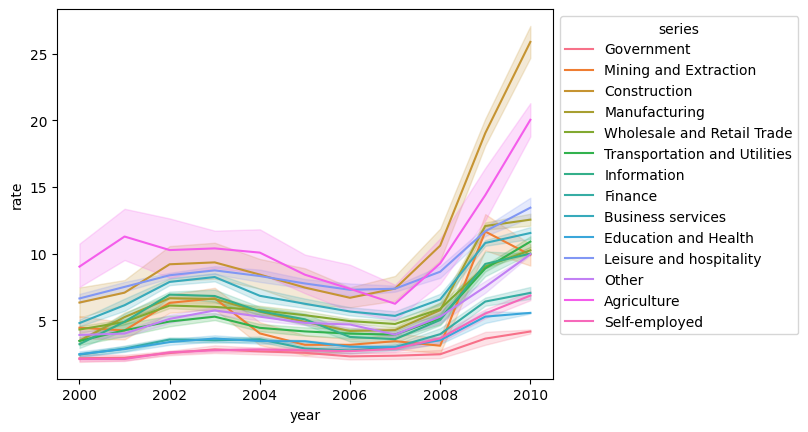

In [33]:
ax = sns.lineplot(x="year", y="rate",
             hue="series",
             data=unemp)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

✅Answer:

We picked a dataset that is about the unemployment in the US during year 2000 to year 2010. We made some visualizations to find what information was hidden in the dataset. Here is what I found.

1. Unemployment count and rate has a correlation of 0.97, this means the population in each industry remains almost the same without sudden increase or decrease. Now limited by time I couldn't look into this, but there might be some mild increase or decrease, as when some industry is in crisis people should run away from it.
2. On average construction and agriculture has the highest unemployment rate. Government, education and health workers has the lowest unempoyment rate.
3. Enemployment rate peaks after the year 2008, as it is the year of the great recession. Highest unemployment rate occured on 2010 in construction, with a number of 25.9%:, within the same year agriculture has a second highest unemployment rate of 20.05%.
4. Farmers lost their job mainly in winter as there is no work to be done in winter. Construction workers also lost their job mainly in winter, but I think that is only because works are done before Chrismas and they resign from their job to get back to home. The next year they find a new company to start again.
5. One interesting thing is , the unemployment rate for mining workers decreased during the great recession. The less interesting fact is, they could be from other industries, even students.